In [89]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

cityDF = pd.read_csv(city_data_to_load)
rideDF = pd.read_csv(ride_data_to_load)
rideDF.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [91]:
rideDF.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [92]:
cityDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [93]:
pyberDf = pd.merge(rideDF, cityDF, how="left", on=["city", "city"])
pyberDf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [94]:
# make dataframes for urban, suburban, and rural types
urbanDf = pyberDf[pyberDf["type"] == "Urban"]
suburbanDf = pyberDf[pyberDf["type"] == "Suburban"]
ruralDf = pyberDf[pyberDf["type"] == "Rural"]


In [95]:
# make ride count variable for urban, suburban, and rural types
urbanRideCount = urbanDf.groupby(["city"]).count()["ride_id"]
suburbanRideCount = suburbanDf.groupby(["city"]).count()["ride_id"]
ruralRideCount = ruralDf.groupby(["city"]).count()["ride_id"]


In [96]:
# make average fare variable for urban, suburban, and rural types
urbanAvgFare = urbanDf.groupby(["city"]).mean()["fare"]
suburbanAvgFare = suburbanDf.groupby(["city"]).mean()["fare"]
ruralAvgFare = ruralDf.groupby(["city"]).mean()["fare"]


In [97]:
# make driver count variable for urban, suburban, and rural types
urbanDriverCount = urbanDf.groupby(["city"]).mean()["driver_count"]
suburbanDriverCount = suburbanDf.groupby(["city"]).mean()["driver_count"]
ruralDriverCount = ruralDf.groupby(["city"]).mean()["driver_count"]


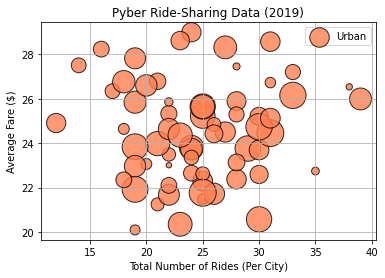

In [98]:
plt.scatter(urbanRideCount, urbanAvgFare, s=urbanDriverCount*10, c="coral", edgecolor="black", linewidths=1, alpha=.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


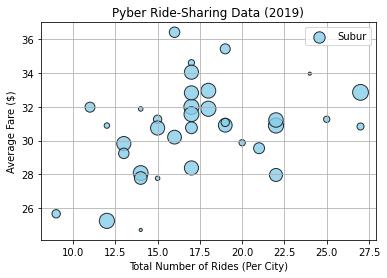

In [99]:
plt.scatter(suburbanRideCount, suburbanAvgFare, s=suburbanDriverCount*10,
            c="skyblue", edgecolor="black", linewidths=1, alpha=.8, label="Subur")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


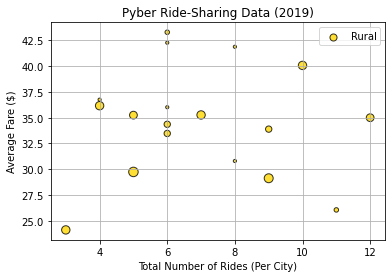

In [100]:
plt.scatter(ruralRideCount, ruralAvgFare, s=ruralDriverCount*10,
            c="gold", edgecolor="black", linewidths=1, alpha=.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


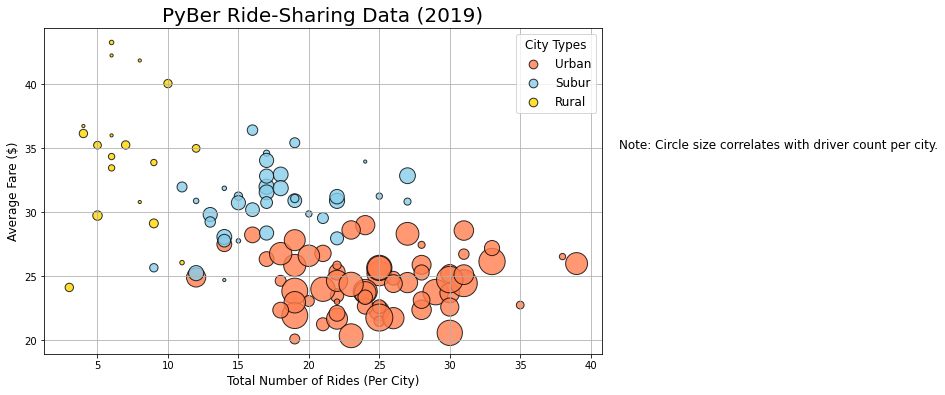

In [101]:
# Build scatter plots for data
plt.subplots(figsize=(10, 6))
plt.scatter(urbanRideCount, urbanAvgFare, s=urbanDriverCount*10,
            c="coral", edgecolor="black", linewidths=1, alpha=.8, label="Urban")

plt.scatter(suburbanRideCount, suburbanAvgFare, s=suburbanDriverCount*10,
            c="skyblue", edgecolor="black", linewidths=1, alpha=.8, label="Subur")

plt.scatter(ruralRideCount, ruralAvgFare, s=ruralDriverCount*10,
            c="gold", edgecolor="black", linewidths=1, alpha=.8, label="Rural")

#Incorporate other graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("Analysis/Fig1.jpeg")
# Show the plot
plt.show()
